<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

**Read big file ()**

In [1]:
import Bio.SeqIO

In [12]:
tmp = []
for record in Bio.SeqIO.parse("data/salmonella-enterica.reads.fna","fasta"):
    tmp.append(str(record.seq))

In [14]:
len(tmp)*2.5

4982917.5

In [ ]:
len(seqs)*len(seqs[0])

In [ ]:
498291750/5e6

In [ ]:
seqs = []
for record in Bio.SeqIO.parse("protein-structure-prediction/hands-on/reference-data/salmonella-enterica.reads.fna","fasta"):
    seqs.append(str(record.seq))

In [2]:
seqs = {}
K = 20
for record in Bio.SeqIO.parse("data/salmonella-enterica.reads.fna","fasta"):
    seq = str(record.seq)
    for i in range(len(seq) - K + 1):
        chunk = seq[i:i+K]
        if chunk not in seqs:
            seqs[chunk] = 0
        seqs[chunk] += 1

In [3]:
len(seqs)

32299525

In [16]:
import numpy as np
np.max(np.array(list(seqs.values())))

2199

In [5]:
counts = list(seqs.values())

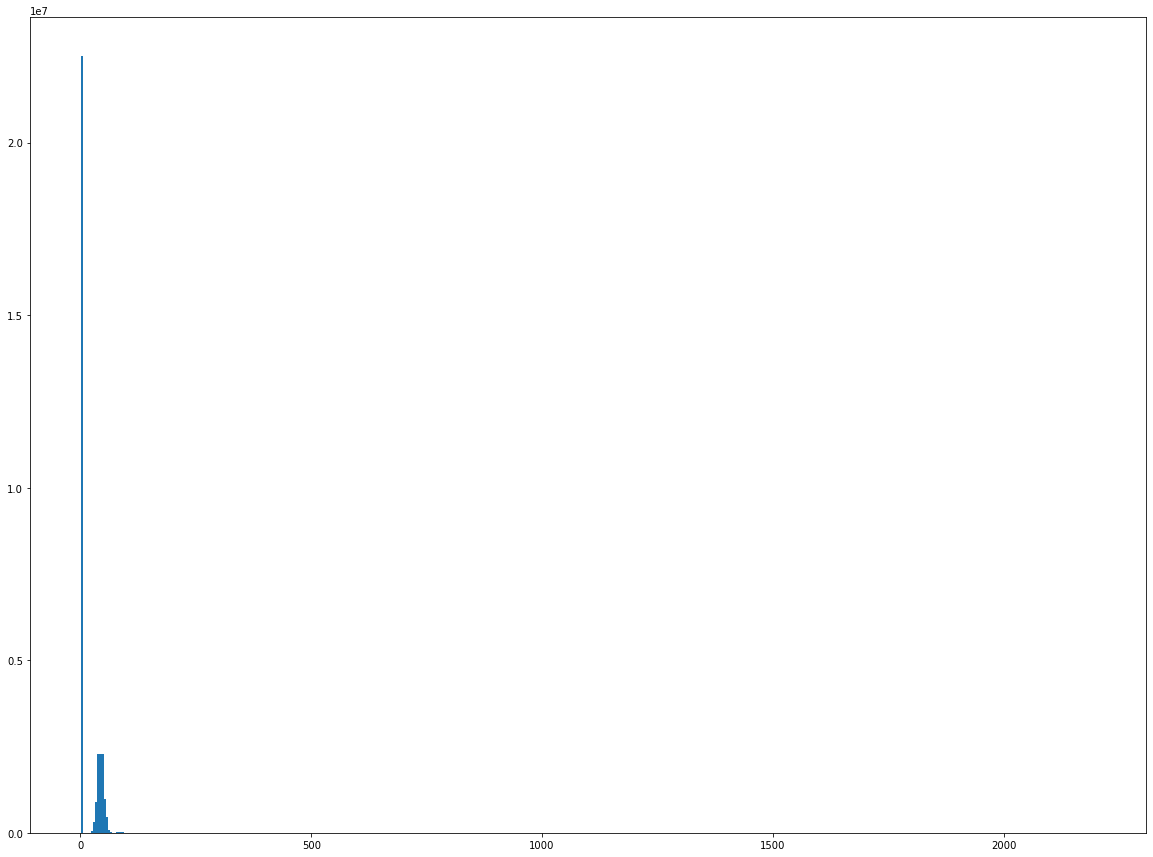

In [11]:
import matplotlib.pyplot as plt
_, ax = plt.subplots(figsize=(20, 15))
ax.hist(counts, bins=len(set(counts)))
plt.show()

In [19]:
(1 - 0.99**20)*32299525
# number of kmers without errors

5881519.421404805

In [16]:
rights = [x for x in counts if x > 1]

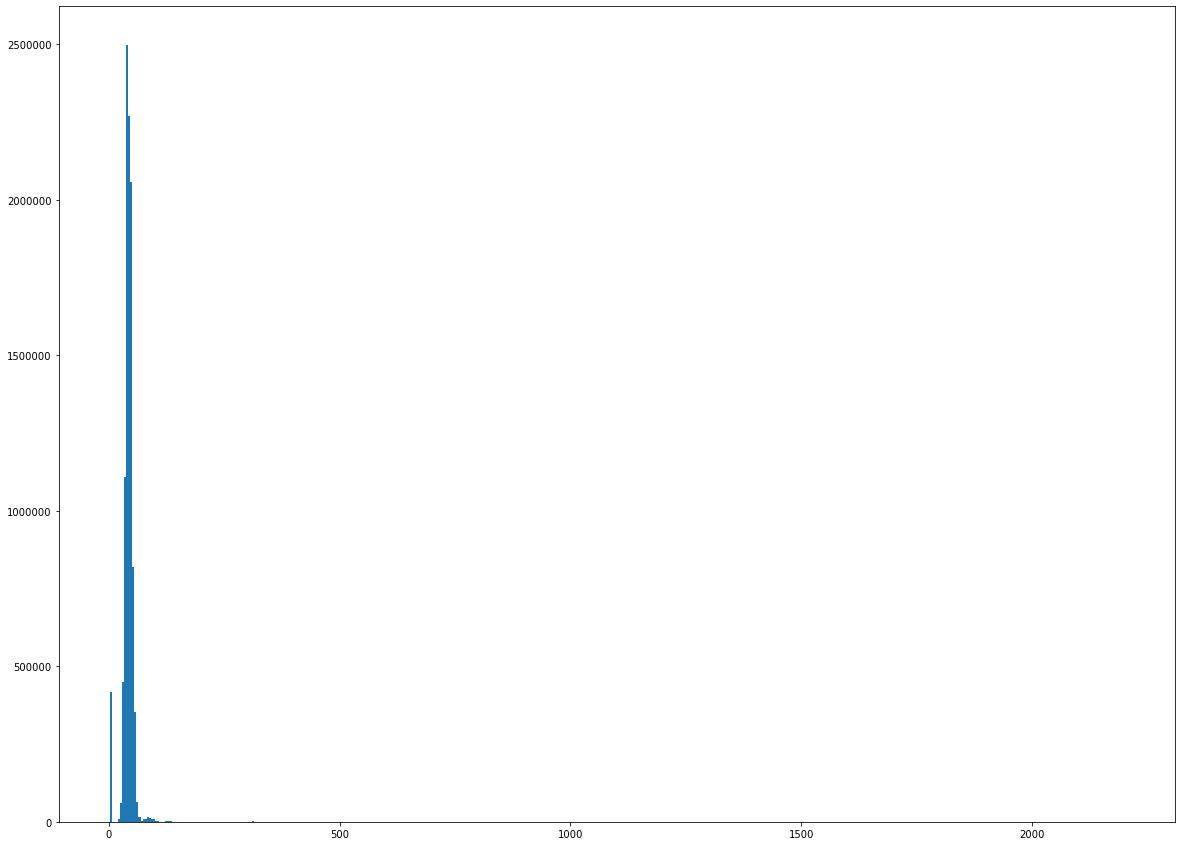

In [17]:
import matplotlib.pyplot as plt
_, ax = plt.subplots(figsize=(20, 15))
ax.hist(rights, bins=len(set(rights)))
plt.show()

In [15]:
2.5e7

25000000.0

In [ ]:
class Node(object):
    def __init__(self, data):
        self.data = data
        self.children = {}
        self.parent = None
        self.count = 0
        
    def __str__(self):
        return f"{self.data}: parent {self.parent.data}, children {list(self.children.keys())}"

    def add_child(self, obj):
        self.children[obj.data] = obj
        
    def set_parent(self, obj):
        self.parent = obj
        
    def get_child(self, data):
        return self.children[data]

In [ ]:
len(seqs)

In [ ]:
roots = {}
K = 30
leaves = set()

for seq in seqs:
    for i in range(len(seq) - K + 1):
        s = seq[i:i+K]
        if s[0] not in roots:
            roots[s[0]] = Node(s[0])
        parent = roots[s[0]]
        for j in range(1, len(s)):
            if s[j] not in parent.children:
                new_node = Node(s[j])
                parent.add_child(new_node)
                new_node.set_parent(parent)
            parent = parent.get_child(s[j])
        parent.count += 1
        leaves.add(parent)

In [ ]:
for x in list(leaves):
    print(x, ", count =", x.count)

In [ ]:
print(roots['C'])

In [ ]:
seqs[0]

In [ ]:
for x in roots:
    x = roots[x]
    y = x
    while len(y.children) != 0:
        print(y.data, end='')
        y = y.children[list(y.children.keys())[0]]
    print()